In [107]:
# Import basic libraries 
import os
import pandas as pd 
import numpy as np
import seaborn as sns
from string import ascii_uppercase
from pandas import DataFrame
import matplotlib.pyplot as plt        
%matplotlib inline

import sklearn.preprocessing as skp
import sklearn.model_selection as skm
import os
#import classification modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
# Selection
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
#import decision tree plotting libraries
# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score 
from sklearn.model_selection import cross_val_score

In [108]:
df = pd.read_csv('hepatitis.csv')

In [109]:
df.isnull().sum() # Mengecek nilai null

age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
class             0
dtype: int64

In [110]:
df["class"].replace((1,2),(0,1),inplace=True)

In [111]:
# Mengganti usia berdasarkan Depkes RI 2009
df["age"]=np.where((df["age"]>5) & (df["age"]<11),"1",
                   np.where((df["age"]>=12) & (df["age"]<=25),"2",
                   np.where((df["age"]>25) & (df["age"]<=45),"3",
                   np.where((df["age"]>45) & (df["age"]<=65),"4",
                            np.where((df["age"]<=5),"0",
                            "5")))))

In [112]:
df['age']=df['age'].astype(str).astype(int) # merubah jadi int

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             142 non-null    int32  
 1   sex             142 non-null    int64  
 2   steroid         142 non-null    int64  
 3   antivirals      142 non-null    int64  
 4   fatigue         142 non-null    int64  
 5   malaise         142 non-null    int64  
 6   anorexia        142 non-null    int64  
 7   liver_big       142 non-null    int64  
 8   liver_firm      142 non-null    int64  
 9   spleen_palable  142 non-null    int64  
 10  spiders         142 non-null    int64  
 11  ascites         142 non-null    int64  
 12  varices         142 non-null    int64  
 13  bilirubin       142 non-null    float64
 14  alk_phosphate   142 non-null    int64  
 15  sgot            142 non-null    int64  
 16  albumin         142 non-null    float64
 17  protime         142 non-null    int

In [114]:
#menghapus fitur yang berkorelasi tinggi
correlated_features = set()
correlation_matrix = df.drop('class', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [115]:
correlated_features

set()

In [116]:
X = df.drop('class', axis=1)
target = df['class']

## Menguji perbandingan Classifier tanpa pendekatan apapun

In [304]:
#logistic regression
clfOurMethod = LogisticRegression()
scores_LR_acc = cross_val_score(clfOurMethod, X, target,cv=10,scoring='accuracy')
scores_LR_precision = cross_val_score(clfOurMethod, X, target, cv=10,scoring='precision')
scores_LR_roc = cross_val_score(clfOurMethod, X, target, cv=10,scoring='roc_auc')
print("Logistic Regression")
print("Accuracy", np.mean(scores_LR_acc)*100)
print("Precision", np.mean(scores_LR_precision)*100)
print("ROC AUC", np.mean(scores_LR_roc)*100)

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

Logistic Regression
Accuracy 83.80952380952381
Precision 89.01159951159953
ROC AUC 83.3080808080808


c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [305]:
#random forest
clfOurMethod = RandomForestClassifier(random_state = 42)
scores_RF_acc = cross_val_score(clfOurMethod, X, target,cv=10,scoring='accuracy')
scores_RF_precision = cross_val_score(clfOurMethod, X, target, cv=10,scoring='precision')
scores_RF_roc = cross_val_score(clfOurMethod, X, target, cv=10,scoring='roc_auc')
print("Logistic Regression")
print("Accuracy", np.mean(scores_RF_acc)*100)
print("Precision", np.mean(scores_RF_precision)*100)
print("ROC AUC", np.mean(scores_RF_roc)*100)

Logistic Regression
Accuracy 85.23809523809524
Precision 89.8076368076368
ROC AUC 87.51262626262626


In [306]:
#naive
from sklearn.naive_bayes import GaussianNB

clfOurMethod = GaussianNB()
scores_GN_acc = cross_val_score(clfOurMethod, X, target,cv=10,scoring='accuracy')
scores_GN_precision = cross_val_score(clfOurMethod, X, target, cv=10,scoring='precision')
scores_GN_roc = cross_val_score(clfOurMethod, X, target, cv=10,scoring='roc_auc')
print("Logistic Regression")
print("Accuracy", np.mean(scores_GN_acc)*100)
print("Precision", np.mean(scores_GN_precision)*100)
print("ROC AUC", np.mean(scores_GN_roc)*100)

Logistic Regression
Accuracy 78.80952380952381
Precision 93.26673326673328
ROC AUC 86.1489898989899


In [307]:
#decision tree
clfOurMethod = DecisionTreeClassifier()
scores_DT_acc = cross_val_score(clfOurMethod, X, target,cv=10,scoring='accuracy')
scores_DT_precision = cross_val_score(clfOurMethod, X, target, cv=10,scoring='precision')
scores_DT_roc = cross_val_score(clfOurMethod, X, target, cv=10,scoring='roc_auc')
print("Decision Tree")
print("Accuracy", np.mean(scores_DT_acc)*100)
print("Precision", np.mean(scores_DT_precision)*100)
print("ROC AUC", np.mean(scores_DT_roc)*100)

Decision Tree
Accuracy 77.52380952380953
Precision 89.4691142191142
ROC AUC 67.12121212121212


In [308]:
#SVM
clfOurMethod = SVC(kernel="linear")
scores_SVM_acc = cross_val_score(clfOurMethod, X, target,cv=10,scoring='accuracy')
scores_SVM_precision = cross_val_score(clfOurMethod, X, target, cv=10,scoring='precision')
scores_SVM_roc = cross_val_score(clfOurMethod, X, target, cv=10,scoring='roc_auc')
print("Support Vector Machine")
print("Accuracy", np.mean(scores_SVM_acc)*100)
print("Precision", np.mean(scores_SVM_precision)*100)
print("ROC AUC", np.mean(scores_SVM_roc)*100)

Support Vector Machine
Accuracy 82.47619047619048
Precision 89.12210012210012
ROC AUC 84.40656565656566


In [309]:
#AdaBoostClassifier
clfOurMethod = AdaBoostClassifier()
scores_AB_acc = cross_val_score(clfOurMethod, X, target,cv=10,scoring='accuracy')
scores_AB_precision = cross_val_score(clfOurMethod, X, target, cv=10,scoring='precision')
scores_AB_roc = cross_val_score(clfOurMethod, X, target, cv=10,scoring='roc_auc')
print("Ada Boost")
print("Accuracy", np.mean(scores_AB_acc)*100)
print("Precision", np.mean(scores_AB_precision)*100)
print("ROC AUC", np.mean(scores_AB_roc)*100)

Ada Boost
Accuracy 83.14285714285715
Precision 89.97113997113996
ROC AUC 82.33585858585857


In [53]:
#KNeighborsClassifier
clfOurMethod = KNeighborsClassifier()
scores_KNN_acc = cross_val_score(clfOurMethod, X, target,cv=10,scoring='accuracy')
scores_KNN_precision = cross_val_score(clfOurMethod, X, target, cv=10,scoring='precision')
scores_KNN_roc = cross_val_score(clfOurMethod, X, target, cv=10,scoring='roc_auc')
print("KNN")
print("Accuracy", np.mean(scores_KNN_acc)*100)
print("Precision", np.mean(scores_KNN_precision)*100)
print("ROC AUC", np.mean(scores_KNN_roc)*100)

KNN
Accuracy 78.19047619047619
Precision 81.07692307692307
ROC AUC 57.619949494949495


### Recursive Feature Elimination 

In [117]:
rfc = SVC(kernel="linear")
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=SVC(kernel='linear'), scoring='accuracy')

In [118]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 7


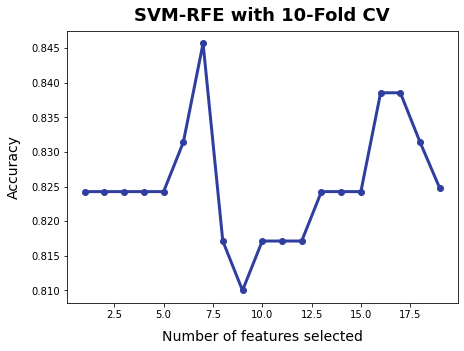

In [119]:
plt.figure(figsize=(7, 5))
plt.title('SVM-RFE with 10-Fold CV', fontsize=18, fontweight='bold', pad=10)
plt.xlabel('Number of features selected', fontsize=14, labelpad=10)
plt.ylabel('Accuracy', fontsize=14, labelpad=10)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3, marker='o')

plt.show()

In [120]:
print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 0  2  3  4  6  8 12 13 14 15 17 18]


## Oversampling SMOTE

In [130]:
from imblearn.over_sampling import SMOTE, ADASYN,BorderlineSMOTE

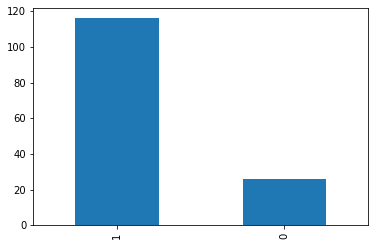

In [131]:
target.value_counts().plot.bar()


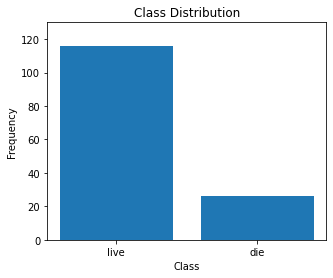

In [132]:
import numpy as np
import matplotlib.pyplot as plt

data = {'live':116, 'die':26}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (5, 4))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.3)
# here we modify the axes, specifying min and max for x and y axes.
plt.axis(ymin=0, ymax=130) 
plt.bar(range(len(data)), data.values(), align='center')
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Class Distribution")
plt.show()

In [133]:
X_resampled, y_resampled = SMOTE().fit_resample(X, target)

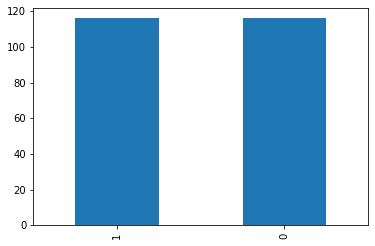

In [134]:
y_resampled.value_counts().plot.bar()

# Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


# Menghitung Performa

# Hyperparameter : GridSearch dengan Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False, True],
    'max_depth': [6, 8],
    'max_features': [2, 3],
    'min_samples_leaf': [2, 4],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 200, 300]
}
# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_resampled, y_resampled);

In [ ]:
#hasil bisa berubah tergantung sampling SMOTE yang diperoleh
grid_search.best_params_

### Menghitung Performa RF dengan hyperparameter 

In [320]:
clfOurMethod = RandomForestClassifier(n_estimators = 100, min_samples_split= 6, min_samples_leaf= 2,
                                     max_features= 3,max_depth= 8, bootstrap= False)
gs_rf_acc = cross_val_score(clfOurMethod, X_resampled, y_resampled, cv=10,scoring='accuracy')
gs_rf_precision = cross_val_score(clfOurMethod, X_resampled, y_resampled, cv=10,scoring='precision')
gs_rf_roc = cross_val_score(clfOurMethod, X_resampled, y_resampled, cv=10,scoring='roc_auc')
print("Our Method (GS+RF)")
print("Accuracy", np.mean(gs_rf_acc)*100)
print("Precision", np.mean(gs_rf_precision)*100)
print("ROC AUC", np.mean(gs_rf_roc)*100)

Our Method (GS+RF)
Accuracy 87.51811594202898
Precision 92.96153846153847
ROC AUC 96.93813131313132


## Perbandingan Classifier

In [321]:
#Plot manual menggunakan https://graphmaker.imageonline.co/multiplebarchart.php

In [ ]:
#Random Forest
from tpot import TPOTClassifier
# Define the hyperparameter configuration space
parameters = {
        'n_estimators': range(20,200),
    "max_features":range(1,64),
    'max_depth': range(1,100),
    "min_samples_split":range(2,11),
    "min_samples_leaf":range(1,11),
    "criterion":['gini','entropy']
             }
# Set the hyperparameters of GA                 
ga2 = TPOTClassifier(generations= 3, population_size= 30, offspring_size= 5,
                                 verbosity= 3, early_stop= 5,
                                 config_dict=
                                 {'sklearn.ensemble.RandomForestClassifier': parameters}, 
                                 cv = 3, scoring = 'accuracy')
ga2.fit(X, target)